## Python packages for data scientists

* [seaborn](https://seaborn.pydata.org/)
    - Based on matplotlib
    - Provides a high-level interface for drawing attractive statistical graphs
    - Similar to the ggplot2 library in R


In [65]:
!pip install seaborn

                                              0.0/294.9 kB ? eta -:--:--
     --                                    20.5/294.9 kB 640.0 kB/s eta 0:00:01
     -------                               61.4/294.9 kB 656.4 kB/s eta 0:00:01
     ----------------------                 174.1/294.9 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\NESTOR\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Loading Python libraries

In [2]:
# Press shift-enter to execute a Jupyter notebook cell
# Import the Python Libraries used in the tutorial
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

### 1. Ejemplos Genéricos

In [34]:
#Import Dataset
exercise = sns.load_dataset('exercise')
iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins')
mpg = sns.load_dataset('mpg')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

**Barplot**

C:\Users\NESTOR\AppData\Local\Temp\ipykernel_52152\1737175388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x="who", y="age", estimator='mean',
C:\Users\NESTOR\AppData\Local\Temp\ipykernel_52152\1737175388.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x="fare", y="class", estimator='mean',


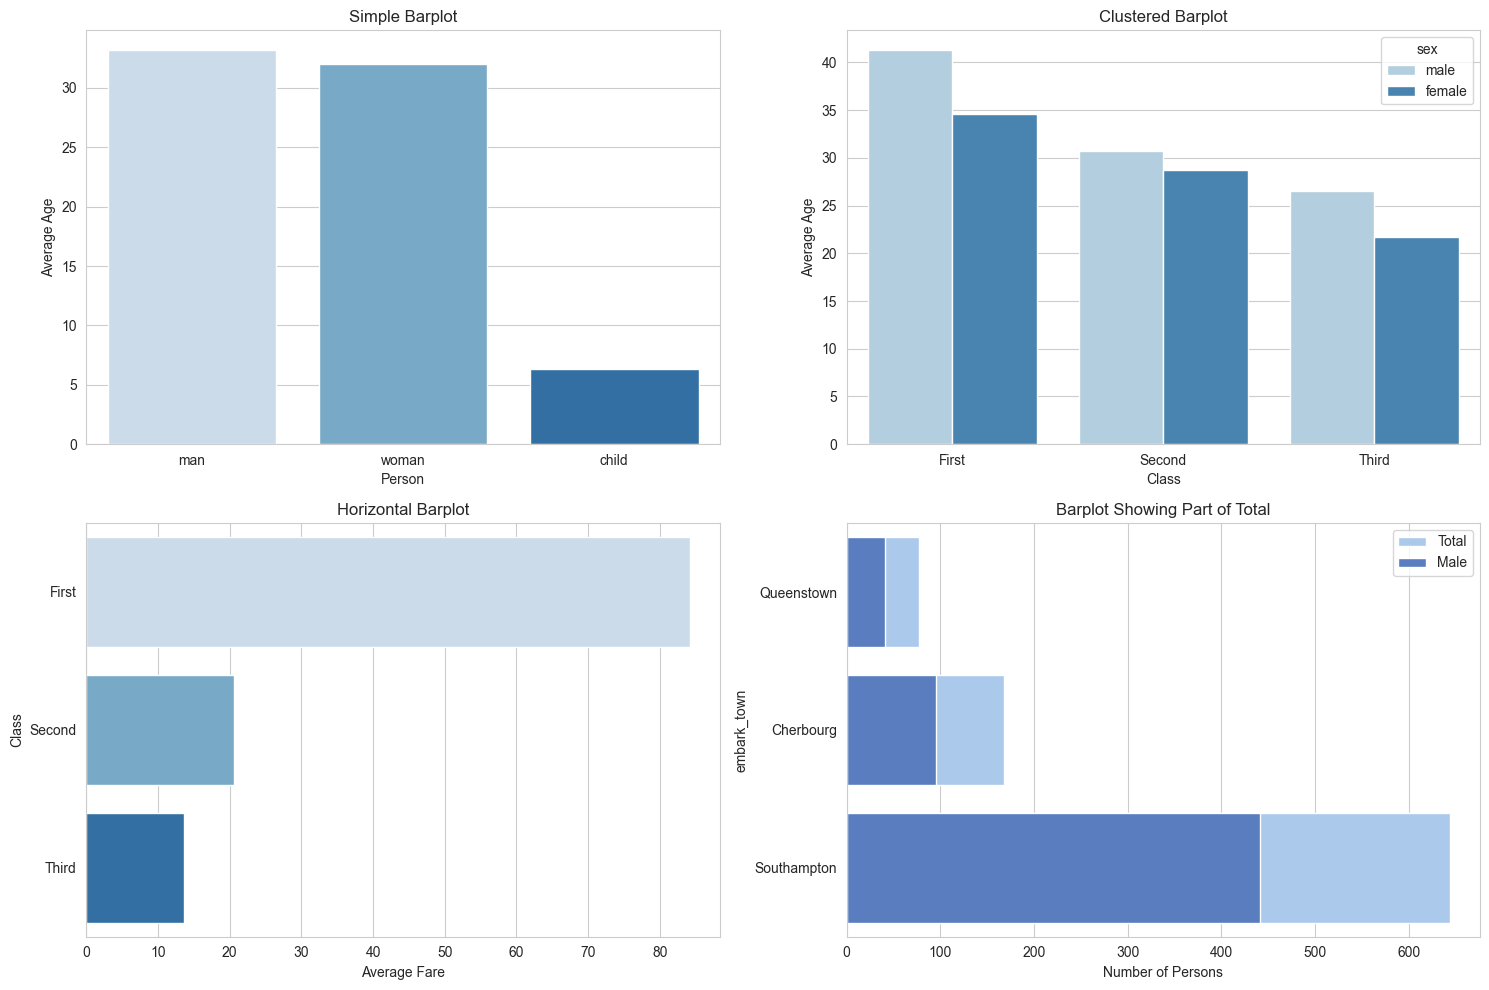

In [22]:
f, ax = plt.subplots(2,2,figsize=(15,10))

# Simple barplot
sns.barplot(data=titanic, x="who", y="age", estimator='mean', 
            errorbar=None, ax= ax[0,0], palette='Blues')
ax[0,0].set_title('Simple Barplot')
ax[0,0].set_xlabel('Person')
ax[0,0].set_ylabel('Average Age')

# Clustered barplot
sns.barplot(data=titanic, x='class', y='age', hue='sex', 
            estimator='mean', errorbar=None, ax= ax[0,1], palette='Blues')
ax[0,1].set_title('Clustered Barplot')
ax[0,1].set_xlabel('Class')
ax[0,1].set_ylabel('Average Age')

# Horizontal barplot
sns.barplot(data=titanic, x="fare", y="class", estimator='mean', 
            errorbar=None, ax= ax[1,0], palette='Blues')
ax[1,0].set_title('Horizontal Barplot')
ax[1,0].set_xlabel('Average Fare')
ax[1,0].set_ylabel('Class')

#Prepare data for next plot
data = titanic.groupby('embark_town').agg({'who':'count','sex': lambda x: (x=='male').sum()}).reset_index()
data.rename(columns={'who':'total', 'sex':'male'}, inplace=True)
data.sort_values('total', inplace=True)

# Barplot Showing Part of Total
sns.set_color_codes("pastel")
sns.barplot(x="total", y="embark_town", data=data,
            label="Total", color="b", ax=ax[1,1])  # Plot the total crashes

sns.set_color_codes("muted")
sns.barplot(x="male", y="embark_town", data=data,
            label="Male", color="b", ax=ax[1,1])  # Plot the crashes where alcohol was involved
ax[1,1].set_title('Barplot Showing Part of Total')
ax[1,1].set_xlabel('Number of Persons')
ax[1,1].legend(loc='upper right')

plt.tight_layout()
plt.show()

**Countplots**

C:\Users\NESTOR\AppData\Local\Temp\ipykernel_52152\2746057746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='alive',


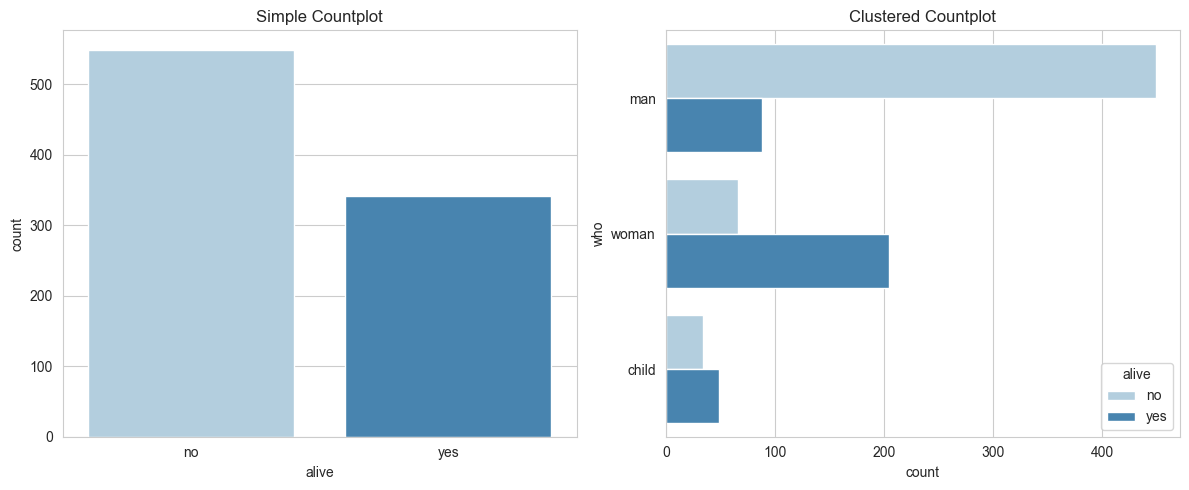

In [23]:
f, ax = plt.subplots(ncols=2,figsize=(12,5))

# Simple Countplot
sns.countplot(data=titanic, x='alive', 
              palette='Blues', ax=ax[0])
ax[0].set_title('Simple Countplot')

# Clustered Countplot
sns.countplot(data=titanic, y="who", 
            hue="alive", ax=ax[1], palette='Blues')
ax[1].set_title('Clustered Countplot')

plt.tight_layout()
plt.show();

**Histogramas**

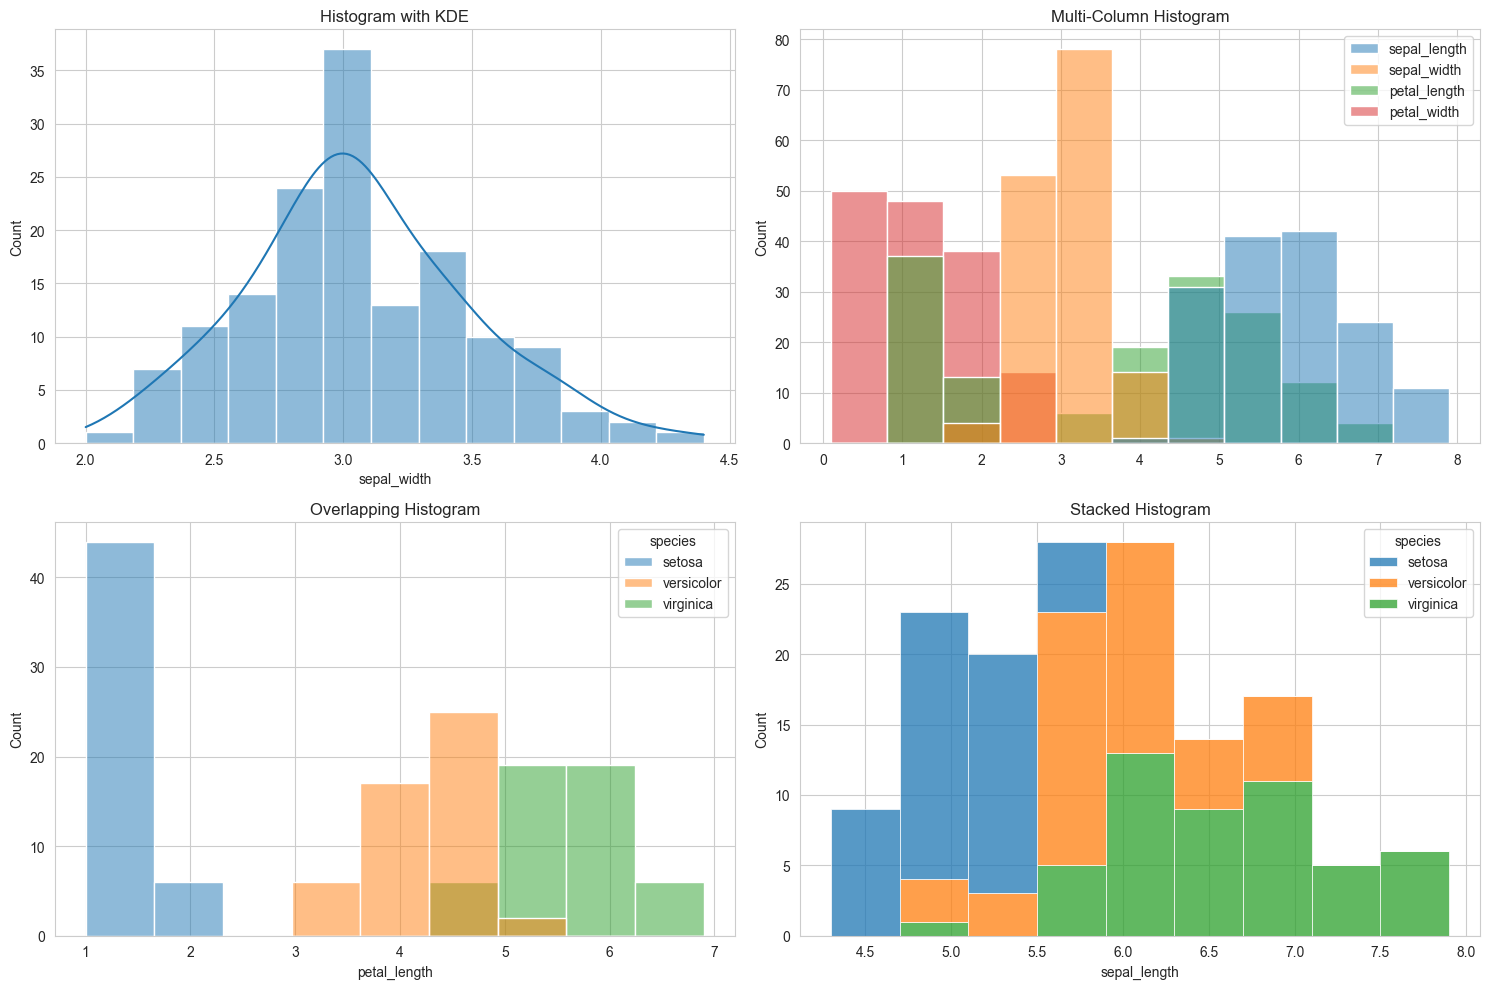

In [24]:
f, ax = plt.subplots(2,2,figsize=(15,10))

# Histogram with KDE
sns.histplot(data=iris, x='sepal_width', 
             kde=True, ax=ax[0,0])
ax[0,0].set_title('Histogram with KDE')

# Histogram with multiple features
sns.histplot(data=iris, ax=ax[0,1])
ax[0,1].set_title('Multi-Column Histogram')

#Overlapping Histogram
sns.histplot(data=iris, x='petal_length', 
             hue='species', ax=ax[1,0])
ax[1,0].set_title('Overlapping Histogram')

#Stacked Histogram
sns.histplot(iris, x='sepal_length', hue='species', multiple='stack',
             linewidth=0.5, ax=ax[1,1])
ax[1,1].set_title('Stacked Histogram')


plt.tight_layout()
plt.show()

**catplots**

C:\Users\NESTOR\AppData\Local\Temp\ipykernel_52152\1069622385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tips, x='day', y='total_bill',


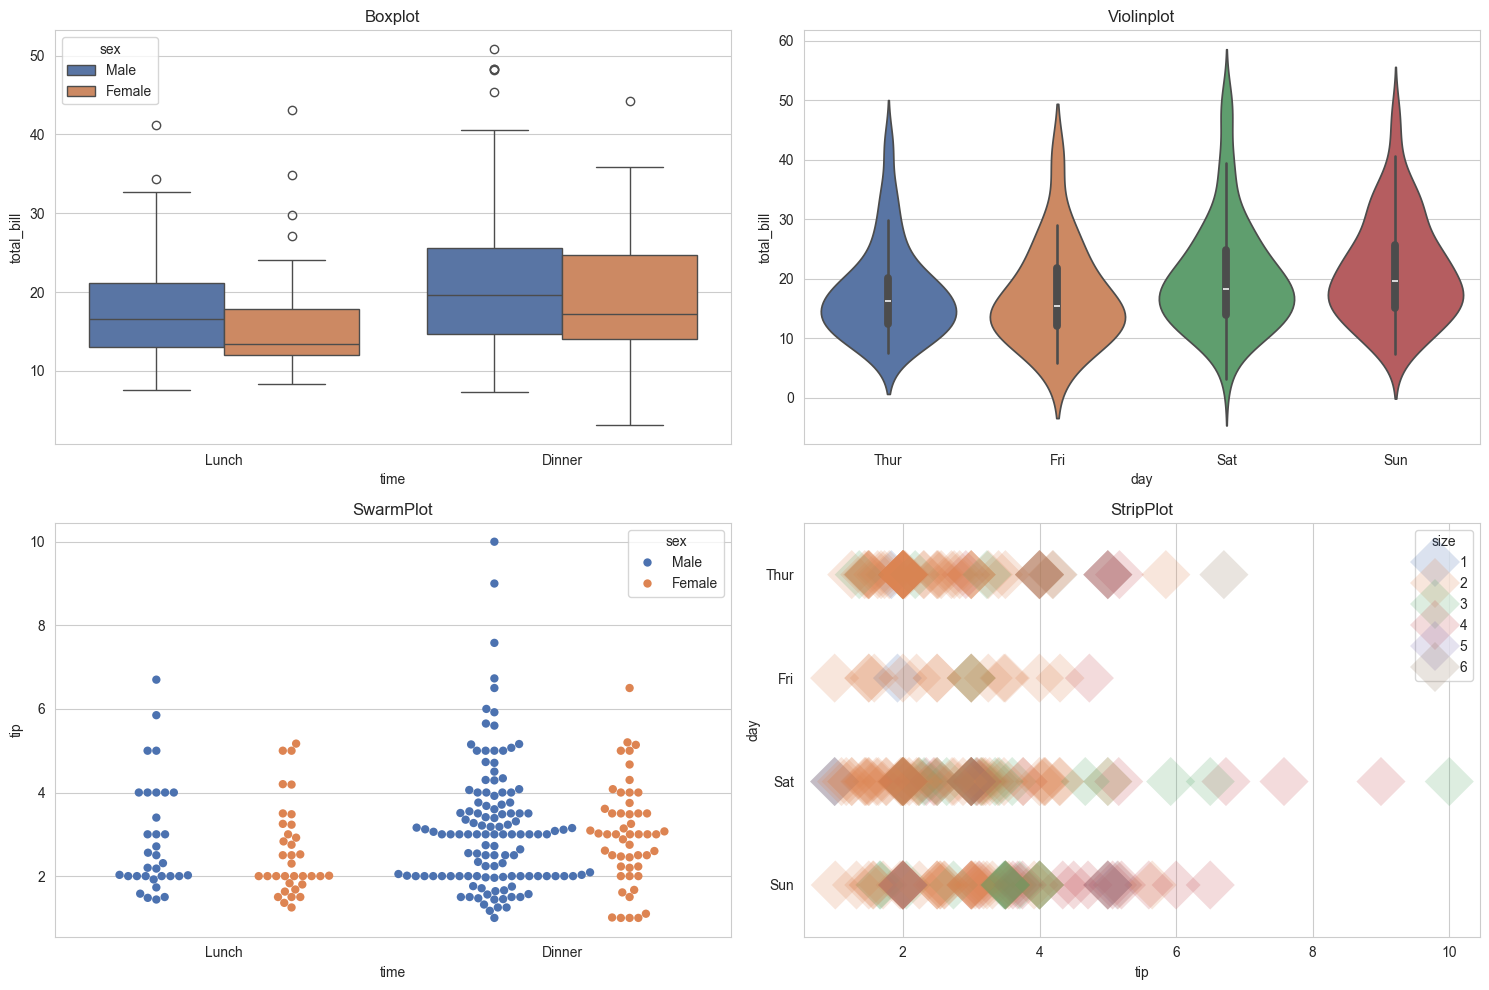

In [25]:
f, ax = plt.subplots(2,2,figsize=(15,10))

# Boxplot
sns.boxplot(data=tips, x='time', y='total_bill',
             hue='sex', ax=ax[0,0], palette='deep')
ax[0,0].set_title('Boxplot')

# Violinplot
sns.violinplot(data=tips, x='day', y='total_bill', 
               palette='deep', ax=ax[0,1])
ax[0,1].set_title('Violinplot')

#Swarmplot
sns.swarmplot(data=tips, x='time', y='tip', dodge=True,
              palette='deep', hue='sex', ax=ax[1,0], s=6)
ax[1,0].set_title('SwarmPlot')

#StripPlot
sns.stripplot(data=tips, x='tip', hue='size', y='day', s=25, alpha=0.2,
             jitter=False, marker='D',palette='deep', ax=ax[1,1])
ax[1,1].set_title('StripPlot')


plt.tight_layout()
plt.show()

**Joint Plots**

C:\Users\NESTOR\AppData\Local\Temp\ipykernel_52152\3637805508.py:1: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="mpg", y="displacement", data=mpg,


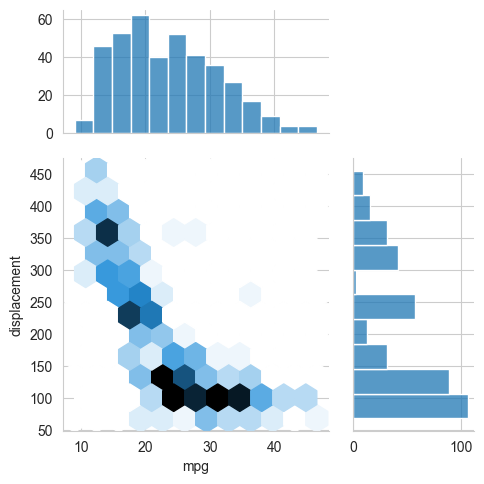

In [26]:
sns.jointplot(x="mpg", y="displacement", data=mpg,
              height=5, kind='hex', ratio=2, ax=ax[0],
             marginal_ticks=True);

C:\Users\NESTOR\AppData\Local\Temp\ipykernel_52152\2713422740.py:1: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="horsepower", y="acceleration", data=mpg,


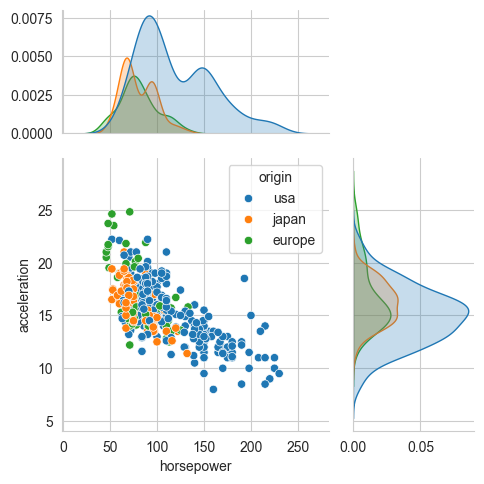

In [27]:
sns.jointplot(x="horsepower", y="acceleration", data=mpg,
             hue="origin", height=5, ratio=2, ax=ax[1],
             marginal_ticks=True);

**KDE Plots**

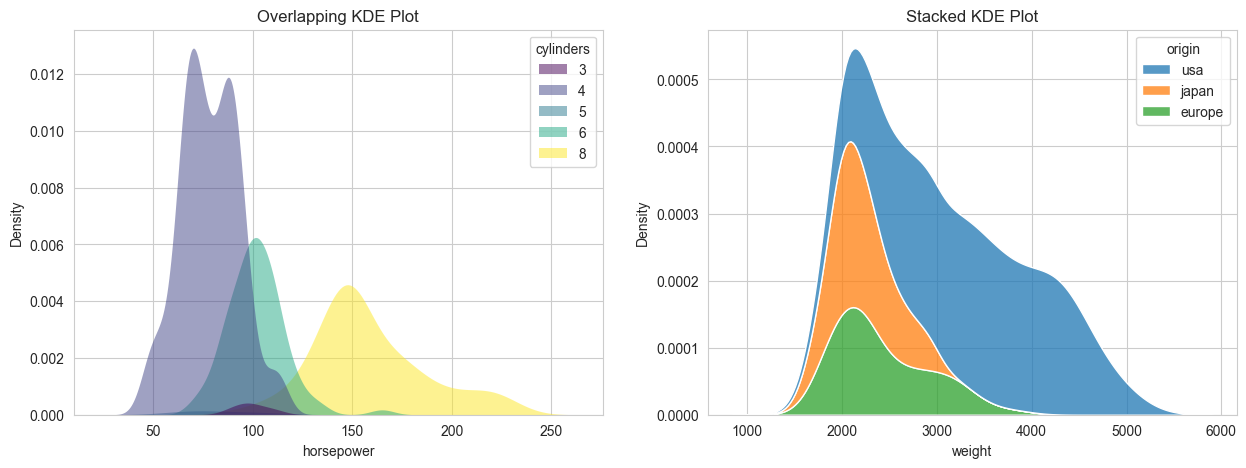

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

#Overlapping KDE Plots
sns.kdeplot(data=mpg, x='horsepower', 
           hue='cylinders', fill=True,
           palette='viridis', 
           alpha=.5, linewidth=0, ax=ax[0])
ax[0].set_title('Overlapping KDE Plot')

#Stacked KDE Plots
sns.kdeplot(data=mpg, x="weight", 
            hue="origin", multiple="stack", 
           ax=ax[1])
ax[1].set_title('Stacked KDE Plot')

plt.show();

**Pairplots**

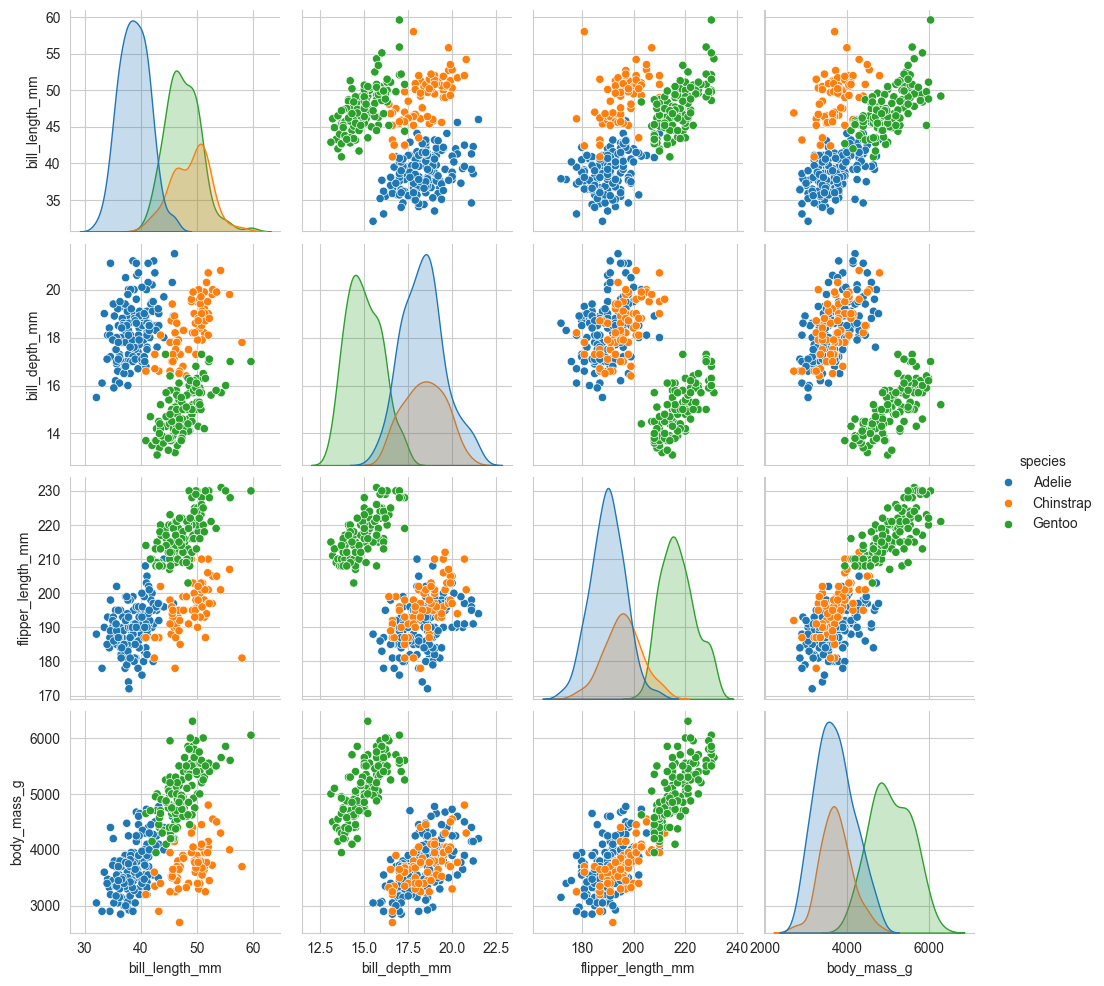

In [30]:
# Pairplot with hues
sns.pairplot(data=penguins, hue='species');

**Heatmaps**

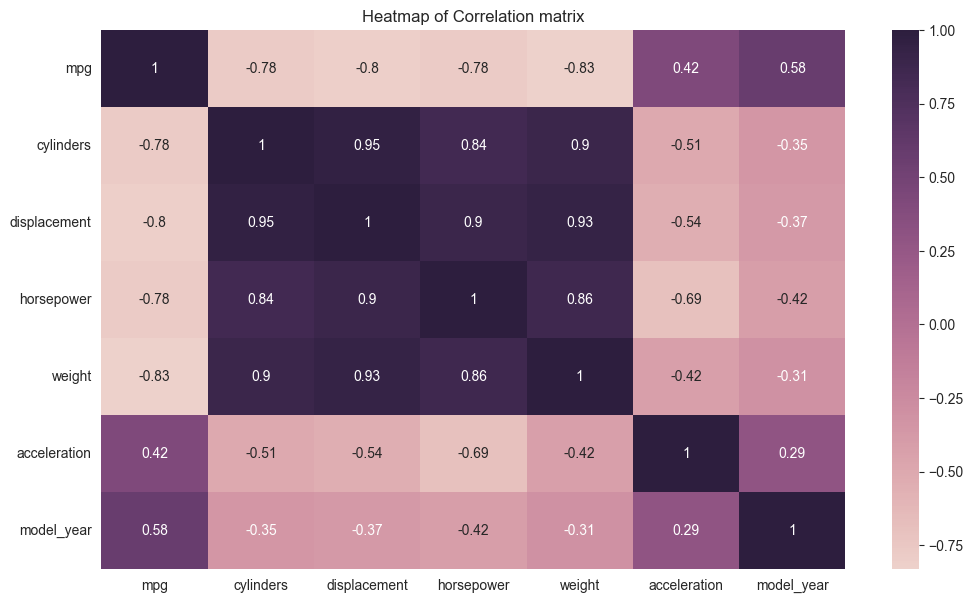

In [31]:
#Selection of numeric columns from the dataset
num_cols = list(mpg.select_dtypes(include='number'))

fig = plt.figure(figsize=(12,7))
#Correlation Heatmap
sns.heatmap(data=mpg[num_cols].corr(), 
            annot=True,cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Heatmap of Correlation matrix')
plt.show()

**Scatter Plots**

C:\Users\NESTOR\AppData\Local\Temp\ipykernel_52152\2414583191.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=mpg, x='weight', y='horsepower',


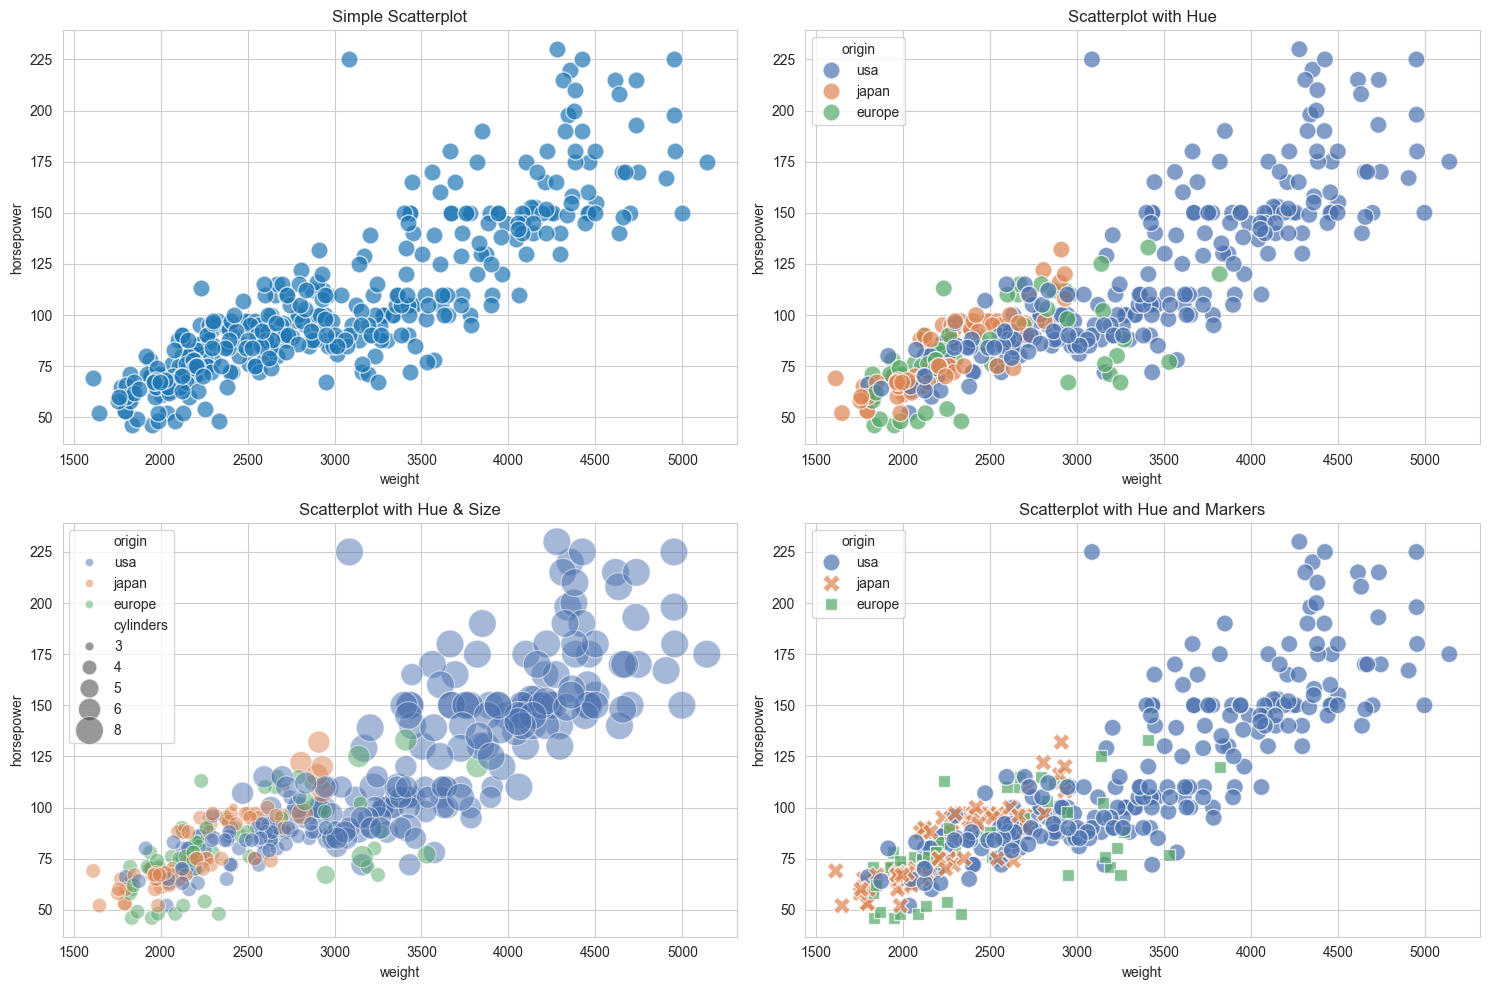

In [32]:
f, ax = plt.subplots(2,2,figsize=(15,10))

# Simple Scatterplot
sns.scatterplot(data=mpg, x='weight', y='horsepower',
             ax=ax[0,0], palette='deep', s=150, alpha=0.7)
ax[0,0].set_title('Simple Scatterplot')

# Scatterplot with Hue
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7,
               hue='origin', palette='deep', ax=ax[0,1])
ax[0,1].set_title('Scatterplot with Hue')

# Scatterplot with Hue & Size
sns.scatterplot(data=mpg, x='weight', y='horsepower', sizes=(40, 400), alpha=.5,
              palette='deep', hue='origin', size='cylinders', ax=ax[1,0])
ax[1,0].set_title('Scatterplot with Hue & Size')

# Scatterplot with Hue and Markers
sns.scatterplot(data=mpg, x='weight', y='horsepower', s=150, alpha=0.7,
              style='origin',palette='deep', hue='origin', ax=ax[1,1])
ax[1,1].set_title('Scatterplot with Hue and Markers')


plt.tight_layout()
plt.show()

### 2. Ejemplo en dataset de salarios

In [3]:
# Read a csv file into Pandas Dataframe
df = pd.read_csv("http://rcs.bu.edu/examples/python/DataAnalysis/Salaries.csv")


In [4]:
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [6]:
# Let's create a copy of this dataframe with a new column names
# If we do not want to create a new data frame, we can add inplace=True argument
df_new =df.rename(columns={'sex': 'gender', 'phd': 'yearsAfterPhD', 'service': 'yearsOfService'})
df_new.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


(array([7.14677085e-06, 8.73494215e-06, 1.74698843e-05, 8.73494215e-06,
        9.52902780e-06, 6.35268520e-06, 3.17634260e-06, 7.94085650e-07]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <BarContainer object of 8 artists>)

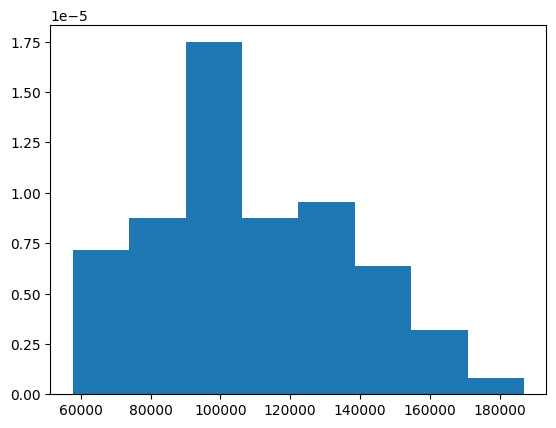

In [7]:
# Use matplotlib to draw a histogram of a salary data
plt.hist(df_new['salary'],bins=8, density=True)

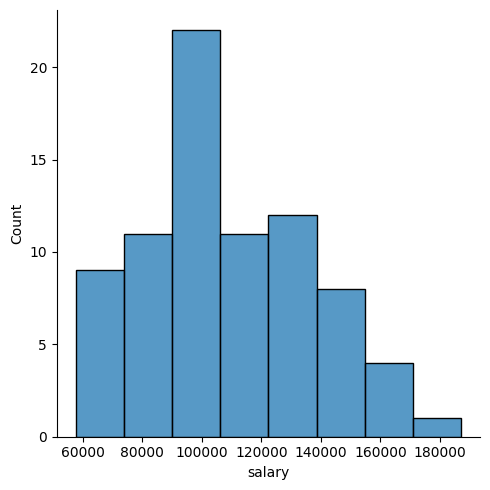

In [8]:
# Use seaborn package to draw a histogram
sns.displot(df_new['salary']);

<Axes: xlabel='rank'>

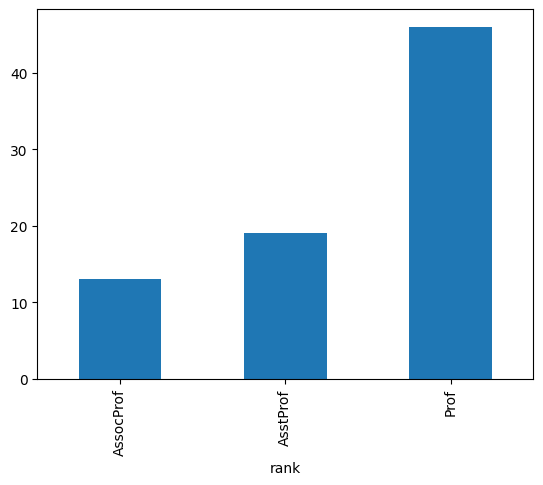

In [9]:
# Use regular matplotlib function to display a barplot
df_new.groupby(['rank'])['salary'].count().plot(kind='bar')

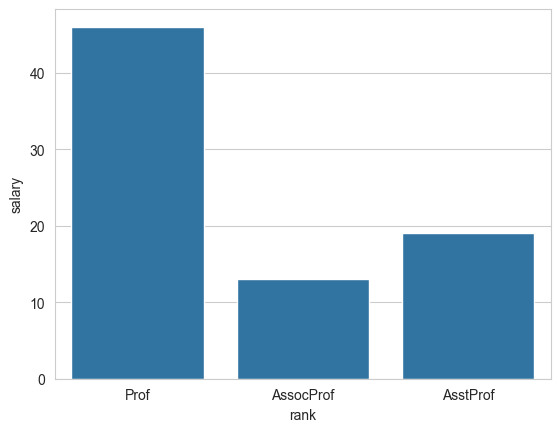

In [10]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")
ax = sns.barplot(x='rank',y ='salary', data=df_new, estimator=len)

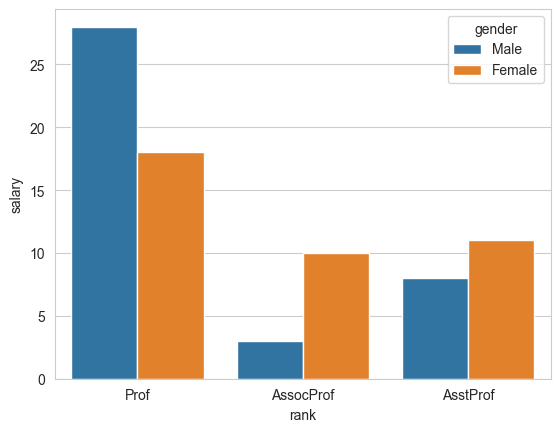

In [11]:
# Split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='gender', data=df_new, estimator=len)

<Axes: xlabel='salary'>

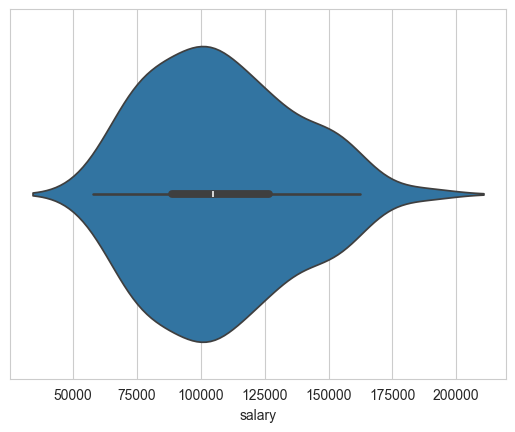

In [12]:
# Violinplot
sns.violinplot(x = "salary", data=df_new)

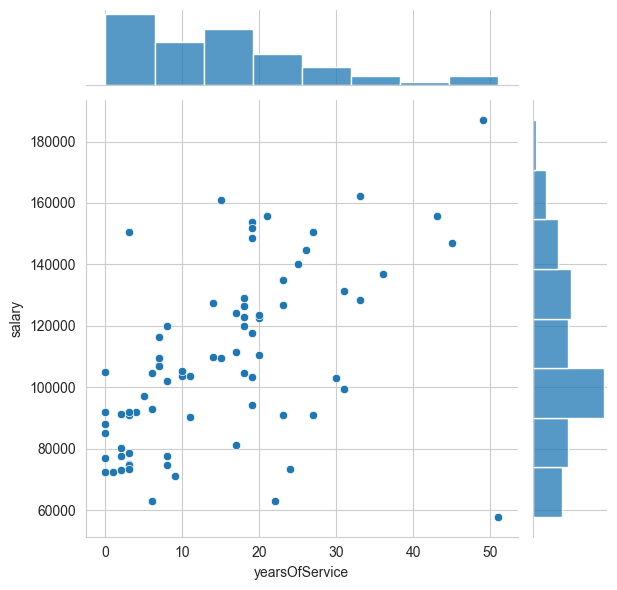

In [13]:
# Scatterplot in seaborn
sns.jointplot(x='yearsOfService', y='salary', data=df_new)

<Axes: xlabel='yearsOfService', ylabel='salary'>

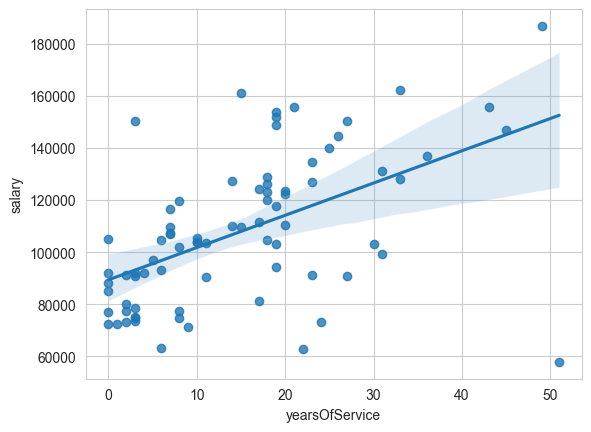

In [14]:
# If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='yearsOfService', y='salary', data=df_new)

<Axes: xlabel='rank', ylabel='salary'>

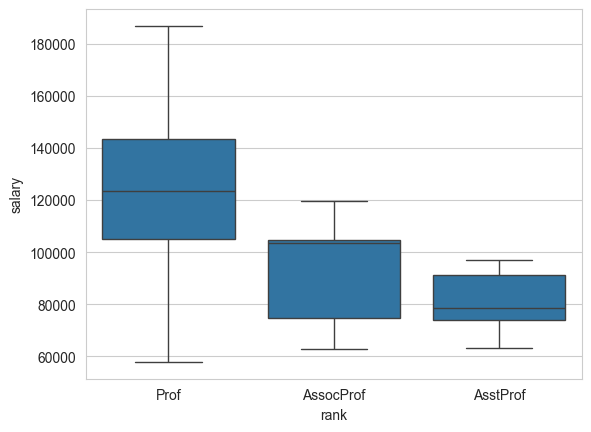

In [15]:
# Box plot
sns.boxplot(x='rank',y='salary', data=df_new)

<Axes: xlabel='rank', ylabel='salary'>

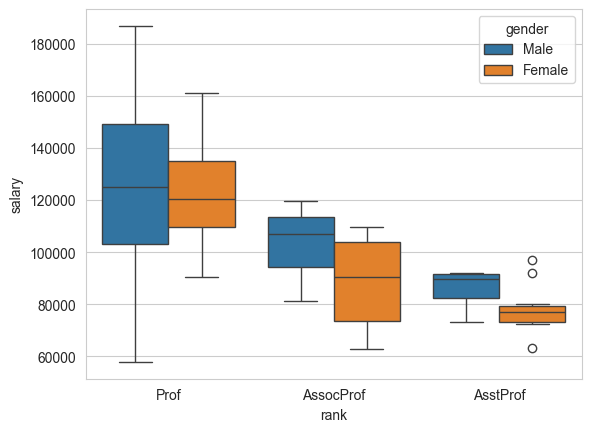

In [16]:
# Side-by-side box plot
sns.boxplot(x='rank', y='salary', data=df_new, hue='gender')

<Axes: xlabel='rank', ylabel='salary'>

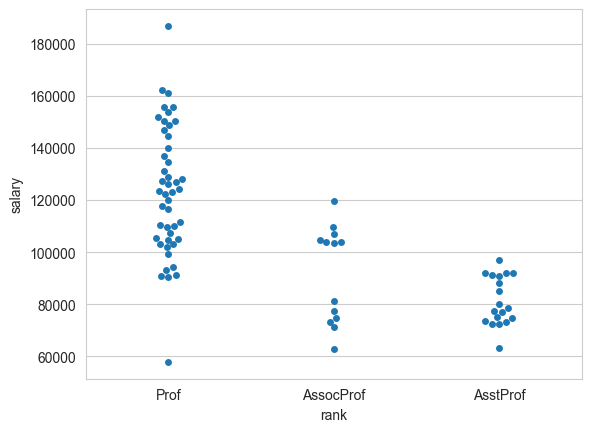

In [17]:
# Swarm plot
sns.swarmplot(x='rank', y='salary', data=df_new)

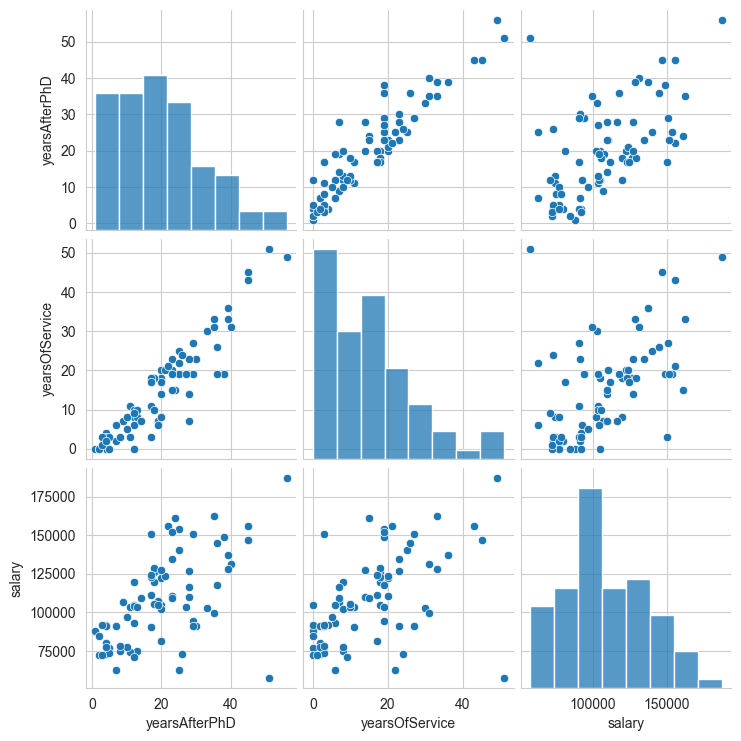

In [19]:
# Pairplot 
sns.pairplot(df_new)